# 1. В приложение загружают зип архив

In [1]:
import platform
import os
from dotenv import load_dotenv

# Загружаем переменные окружения из .env файла
load_dotenv()

# Получаем путь
PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if not PROJECT_ROOT:
    print(f"Переменная PROJECT_ROOT не прописана в .env")
    exit(1)
print(f"Используем домашнюю директорию {PROJECT_ROOT}")

if platform.system() == "Windows":
    print("Код выполняется на Windows")
    !chcp 65001 > nul
    !D:
    %cd "D:\\DS\\code\\hackathon\\hackathon_imoscow2025\\chest_ct_ai_classifier\\src"
    !dir
else:
    print(f"Код выполняется на {platform.system()}")

Используем домашнюю директорию D:\DS\code\hackathon\hackathon_imoscow2025\chest_ct_ai_classifier\src
Код выполняется на Windows
D:\DS\code\hackathon\hackathon_imoscow2025\chest_ct_ai_classifier\src
 Volume in drive D is Data
 Volume Serial Number is 9267-8422

 Directory of D:\DS\code\hackathon\hackathon_imoscow2025\chest_ct_ai_classifier\src

30.09.2025  14:46    <DIR>          .
30.09.2025  14:46    <DIR>          ..
23.09.2025  13:45    <DIR>          -P
30.09.2025  11:06               269 .env.example
28.09.2025  21:07         1 516 502 128model_oneclass.ipynb
27.09.2025  11:19         3 362 028 4chanel_model.ipynb
30.09.2025  11:33    <DIR>          ct_visualizations
29.09.2025  22:02    <DIR>          data
23.09.2025  10:57         5 304 136 data analysis.ipynb
23.09.2025  10:57            42 709 dataset_prepare.ipynb
28.09.2025  21:07         1 516 502 data_preprocessing.ipynb
30.09.2025  10:37    <DIR>          logs
23.09.2025  18:44    <DIR>          MedicalNet
30.09.2025  15:

# 2. Разархивируем архив

Далее я буду тестировать на эталонных данных

# 3. Переводим изображение в тензор 

Указываем путь на  папку в которой лежат изображения. Внутрь не заходим. Нужно определить куда сохраняем полученные тензоры, оттуда потом отдаем их в моделль

In [ ]:
!python scripts/prepare_ct_medicalnet_format.py --input "D:\DS\DataSets\hackathon2025\Датасет\norma_anon" \
 --output "data/test_ideal"

^C


2025-09-30 15:37:12,129 - INFO - Found 1 patient directories
2025-09-30 15:37:12,129 - INFO - Target output tensor shape: (1, 1, 256, 256, 256)
2025-09-30 15:37:12,129 - INFO - ✅ NO isotropic resampling — original resolution preserved (in-plane & slice thickness)
2025-09-30 15:37:12,129 - INFO - ✅ Adaptive percentile normalization: 1.0-99.0%
2025-09-30 15:37:12,129 - INFO - Starting processing...

Processing patients: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]
2025-09-30 15:37:17,951 - INFO - 
2025-09-30 15:37:17,951 - INFO - PROCESSING COMPLETED
2025-09-30 15:37:17,951 - INFO - Total patients: 1
2025-09-30 15:37:17,951 - INFO - Successfully processed: 1
2025-09-30 15:37:17,951 - INFO - Failed: 0
2025-09-30 15:37:17,952 - INFO - Success rate: 100.0%
2025-09-30 15:37:17,952 - INFO - Output directory: data\test_ideal
2025-09-30 15:37:17,952 - INFO - Report saved to: data\test_ideal\processing_report.json
2025-09-30 15:37:17,952 - INFO - ================================================

Это тоже самое, но с другим файлом. Важно, что скрипт поддерживает загрузку батчем.

In [2]:
!python scripts/prepare_ct_tensors.py --input "D:\DS\DataSets\hackathon2025\Датасет\pneumonia_anon" \
 --output "data/test_ideal"

2025-09-30 09:16:47,360 - INFO - Found 1 patient directories
2025-09-30 09:16:47,360 - INFO - Target output tensor shape: (1, 1, 256, 256, 256)
2025-09-30 09:16:47,361 - INFO - ✅ NO isotropic resampling — original resolution preserved (in-plane & slice thickness)
2025-09-30 09:16:47,361 - INFO - ✅ Adaptive percentile normalization: 1.0-99.0%
2025-09-30 09:16:47,361 - INFO - Starting processing...

Processing patients: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
2025-09-30 09:16:49,555 - INFO - 
2025-09-30 09:16:49,555 - INFO - PROCESSING COMPLETED
2025-09-30 09:16:49,555 - INFO - Total patients: 1
2025-09-30 09:16:49,555 - INFO - Successfully processed: 0
2025-09-30 09:16:49,555 - INFO - Failed: 1
2025-09-30 09:16:49,555 - INFO - Success rate: 0.0%
2025-09-30 09:16:49,556 - INFO - Output directory: data\test_ideal
2025-09-30 09:16:49,556 - INFO - Report saved to: data\test_ideal\processing_report.json
2025-09-30 09:16:49,556 - INFO - ==================================================

Это тоже самое, проходим мимо

In [3]:
!python scripts/prepare_ct_tensors.py --input "D:\DS\DataSets\hackathon2025\Датасет\pneumotorax_anon" \
 --output "data/test_ideal" --verbose

2025-09-30 09:17:02,218 - INFO - Found 1 patient directories
2025-09-30 09:17:02,218 - INFO - Target output tensor shape: (1, 1, 256, 256, 256)
2025-09-30 09:17:02,218 - INFO - ✅ NO isotropic resampling — original resolution preserved (in-plane & slice thickness)
2025-09-30 09:17:02,218 - INFO - ✅ Adaptive percentile normalization: 1.0-99.0%
2025-09-30 09:17:02,218 - INFO - Starting processing...

Processing patients:   0%|          | 0/1 [00:00<?, ?it/s]2025-09-30 09:17:02,687 - INFO - Loaded pneumotorax_anon: torch.Size([476, 512, 512])
2025-09-30 09:17:06,372 - INFO - ✓ pneumotorax_anon: range=[-1.000, 1.000], mean=-0.038, std=0.590

Processing patients: 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
2025-09-30 09:17:06,418 - INFO - 
2025-09-30 09:17:06,419 - INFO - PROCESSING COMPLETED
2025-09-30 09:17:06,419 - INFO - Total patients: 1
2025-09-30 09:17:06,419 - INFO - Successfully processed: 1
2025-09-30 09:17:06,419 - INFO - Failed: 0
2025-09-30 09:17:06,419 - INFO - Success rate: 

На выходе получаем .pt на нем уже можем делать предикт

# 4. Предсказание на модели

Вообще в моделе есть в мейне функция чтения тензоров. Но мне было удобнее сделать это отдельно тут 

In [3]:
# Читаем тензор
import torch
from pathlib import Path
def read_tensor(path: Path) -> torch.Tensor:
    """Чтение тензора из PyTorch файла (.pt, .pth)"""
    try:
        tensor = torch.load(path, weights_only=False, map_location='cpu')
        
        # Если это словарь с 'state_dict' или 'tensor', извлекаем тензор
        if isinstance(tensor, dict):
            if 'tensor' in tensor:
                tensor = tensor['tensor']
            elif 'state_dict' in tensor:
                # Это чекпоинт модели, возвращаем как есть или извлекаем тензор
                raise ValueError("Файл содержит state_dict модели, а не тензор. Используйте load_state_dict для модели.")
            else:
                # Если словарь содержит тензор, извлекаем первый
                for key, value in tensor.items():
                    if isinstance(value, torch.Tensor):
                        return value
                raise ValueError("Не найден тензор в словаре")
        
        if not isinstance(tensor, torch.Tensor):
            raise ValueError(f"Файл не содержит тензор, а содержит: {type(tensor)}")
        
        return tensor
    
    except Exception as e:
        raise RuntimeError(f"Ошибка при чтении PyTorch файла: {e}")

Прочитали тензор

In [4]:
norma = read_tensor("data/test_ideal/norma_anon.pt")

In [5]:
norma.shape

torch.Size([1, 1, 256, 256, 256])

In [5]:
pneumonia = read_tensor("data/test_ideal/pneumonia_anon.pt")

In [7]:
pneumonia.shape

torch.Size([1, 1, 256, 256, 256])

In [6]:
pneumotorax = read_tensor("data/test_ideal/pneumotorax_anon.pt")

In [8]:
pneumotorax.shape

torch.Size([1, 1, 256, 256, 256])

In [1]:
!pwd

/Users/irinamistulova/PycharmProjects/hackathon_imoscow2025/chest_ct_ai_classifier/src


А вот тут нужно кое-что доустановить!!! Это интерпритатор

In [6]:
!pip install captum

Инициализируем модель

In [9]:
from model.inference import MedicalModelInference
from model.config import ModelConfig

config = ModelConfig()
# Создаем inference модуль
inference = MedicalModelInference(
    weights_path="model/outputs/weights/best-epoch=42-val_f1=0.7650-val_auroc=0.8675.ckpt",  
    model_config = config,
)

Learning rate: 0.0001
Batch size: 1
Epochs: 1
Num workers: 0
⚠️  Внимание: Размер входа изменен на 256×256×256
    Может потребоваться пересчет размера полносвязного слоя
✅ Inference модуль инициализирован на устройстве: cuda
📊 Ожидаемый входной размер: 1, 1, 256, 256, 256
🎯 Количество классов: 2


Это простой предикт, его лучше не использовать

In [ ]:
# Получаем предсказание
result = inference.predict(pneumonia)

print(f"Предсказанный класс: {result['prediction']}")
print(f"Уверенность: {result['confidence']:.4f}")
print(f"Вероятности классов: {result['probabilities']}")



Предсказанный класс: 1
Уверенность: 0.9905
Вероятности классов: [0.00948375 0.99051625]


Лучше использовать вот этот. Желательно убрать из инференса " с методом saliency"

🎯 Объяснение для класса 1 с методом saliency


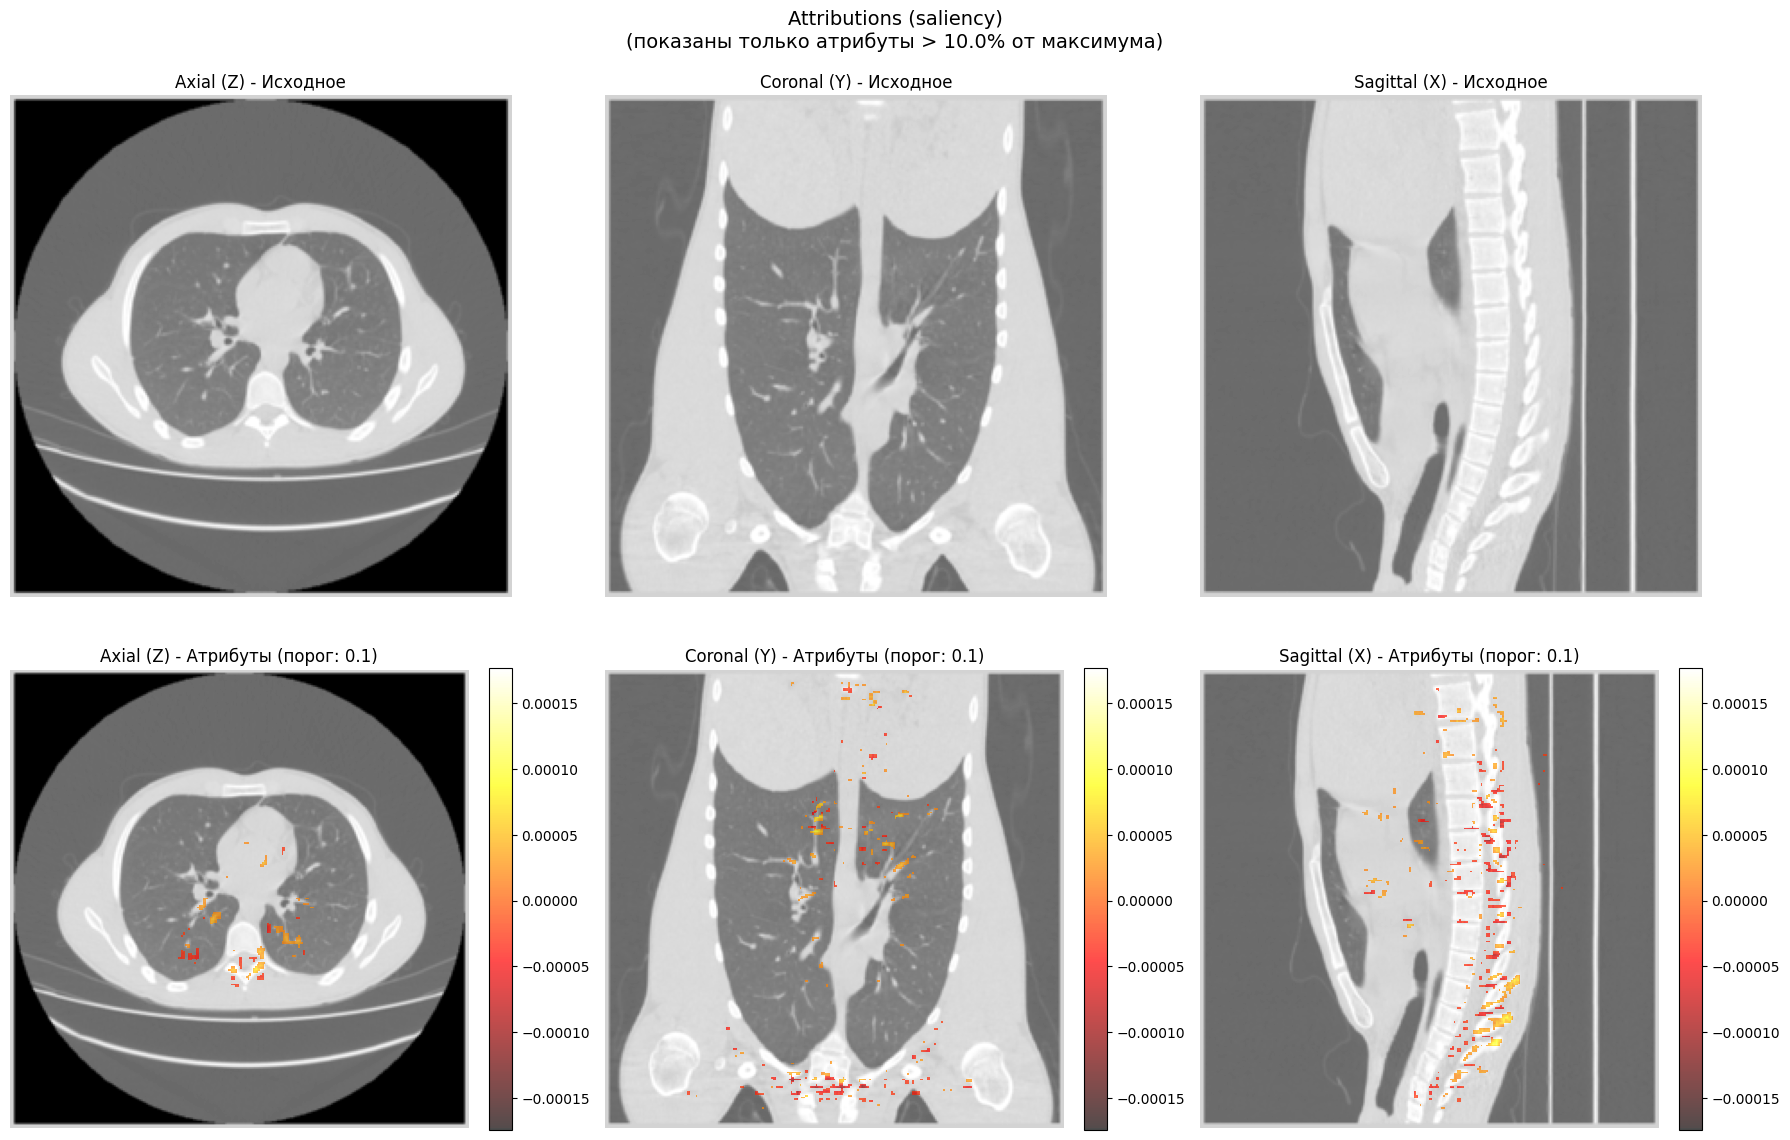

📊 Значимые воксели: 203915/16777216 (1.2%)
📈 Максимальный атрибут: 0.0002, Минимальный: -0.0002


In [13]:
explanation = inference.explain_prediction(norma, method="saliency", visualize=True)

Это предсказание сразу для пачки тензоров

In [ ]:
# Пример батчевого предсказания
batch_tensor = torch.randn(3, 1, 256, 256, 256)
batch_results = inference.predict_batch(batch_tensor)

for i, res in enumerate(batch_results):
    print(f"Образец {i}: класс={res['prediction']}, уверенность={res['confidence']:.4f}")